In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from sentinelhub import SHConfig
from dotenv import load_dotenv
import os

In [53]:
load_dotenv()  # charge automatiquement le .env du dossier courant

config = SHConfig()
config.sh_client_id = os.environ.get("SH_CLIENT_ID")
config.sh_client_secret = os.environ.get("SH_CLIENT_SECRET")

In [54]:
list_bbox_centers = [(43.52960344286241, 5.448962145567533),
(48.092094070852475, -1.7036876101196967),
 (48.121222106840435, -1.602864906604979),
 (45.74557103359813, 4.803091960652229),
 (47.8776770361181, -3.909947991759771),
 (44.55378060775165, 4.28389205759154),
 (45.69764498502806, 5.8945655967385315),
 (48.07500134978729, 7.3491231648955155),
 (50.63412206750312, 3.0435779303880106),
 (44.83078182200822, 0.5108123933396876)]

In [55]:
from urban_watch.ml_logic.data import make_bbox_global, get_data

data = get_data(list_bbox_centers, config)

📡 Downloading tile 0 at 43.52960344286241,5.448962145567533 ...
✔ Saved tile 0 in /Users/augustinlafond/code/augustinlafond/project_urban_watch/raw_data/tile_0
📡 Downloading tile 1 at 48.092094070852475,-1.7036876101196967 ...
✔ Saved tile 1 in /Users/augustinlafond/code/augustinlafond/project_urban_watch/raw_data/tile_1
📡 Downloading tile 2 at 48.121222106840435,-1.602864906604979 ...
✔ Saved tile 2 in /Users/augustinlafond/code/augustinlafond/project_urban_watch/raw_data/tile_2
📡 Downloading tile 3 at 45.74557103359813,4.803091960652229 ...
✔ Saved tile 3 in /Users/augustinlafond/code/augustinlafond/project_urban_watch/raw_data/tile_3
📡 Downloading tile 4 at 47.8776770361181,-3.909947991759771 ...
✔ Saved tile 4 in /Users/augustinlafond/code/augustinlafond/project_urban_watch/raw_data/tile_4
📡 Downloading tile 5 at 44.55378060775165,4.28389205759154 ...
✔ Saved tile 5 in /Users/augustinlafond/code/augustinlafond/project_urban_watch/raw_data/tile_5
📡 Downloading tile 6 at 45.697644985

In [56]:
from urban_watch.ml_logic.data import load_data

X, meta = load_data()

In [57]:
from urban_watch.ml_logic.labels import get_bbox_from_features, bbox_to_wgs84

list_bbox, list_crs = get_bbox_from_features()
list_bbox_wgs84 = bbox_to_wgs84(list_bbox, list_crs)

In [58]:
from urban_watch.ml_logic.labels import tile_name_from_bbox_wgs84

tile_names = tile_name_from_bbox_wgs84(list_bbox_wgs84)

In [59]:
from urban_watch.ml_logic.labels import get_label_array

results = get_label_array(tile_names, list_bbox_wgs84, list_bbox, list_crs)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Exemple palette simplifiée
colors = [
    "#006400",  # 10 Trees
    "#ffbb22",  # 20 Shrub
    "#ffff4c",  # 30 Grass
    "#f096ff",  # 40 Crop
    "#fa0000",  # 50 Built-up
    "#b4b4b4",  # 60 Bare
    "#f0f0f0",  # 70 Snow
    "#0064c8",  # 80 Water
    "#0096a0",  # 90 Wetlands
    "#00cf75",  # 95 Mangroves
    "#fae6a0"   # 100 Moss/Lichen
]

cmap = ListedColormap(colors)


In [61]:
image = X[6,:,:,:]

B2, B3, B4, B8, B11 = image[:,:,0], image[:,:,1], image[:,:,2], image[:,:,3], image[:,:,4]

# True color (attention : nécessite une normalisation)
RGB = np.dstack([
    B4,
    B3,
    B2
]).astype(float)

# Normalisation 0-1 pour affichage (important !)
RGB = (RGB - RGB.min()) / (RGB.max() - RGB.min() + 1e-6)

# Normalisation par percentiles (évite que quelques pixels lumineux écrasent tout le contraste)
p2 = np.percentile(RGB, 2)
p98 = np.percentile(RGB, 98)

RGB_stretched = np.clip((RGB - p2) / (p98 - p2), 0, 1)

# Correction gamma (0.7–1.0 recommandé)
gamma = 0.8
RGB_corrected = np.clip(RGB_stretched ** gamma, 0, 1)


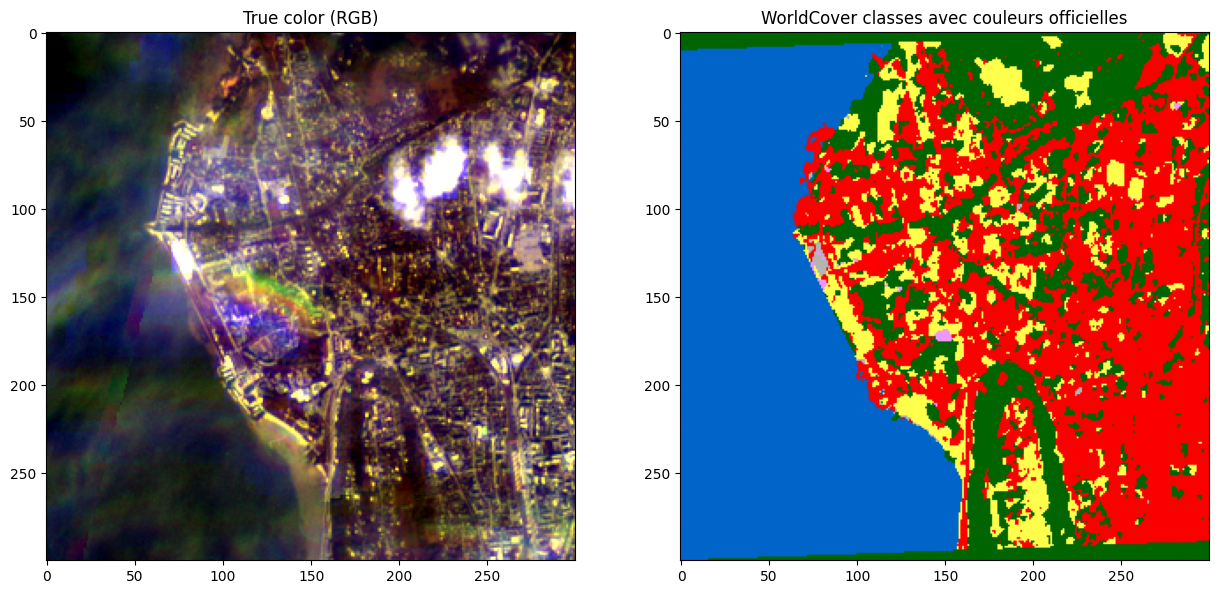

In [62]:
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
plt.imshow(RGB_stretched)
plt.title("True color (RGB)")

plt.subplot(1,2,2)
plt.imshow(results[6], cmap=cmap, vmin=10, vmax=110)
plt.title("WorldCover classes avec couleurs officielles")
plt.show()
